In [2]:
import matplotlib.pyplot as plt
from IPython.display import Math, display
import numpy as np
import sympy as sp
from scipy import constants as const

#add relative path to backend
import sys
sys.path.append('../../clean_diag/backend')

import trap_units as si
from twod_trap import PancakeTrap

In [3]:
initial_power = 49 * si.uW 

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= 0 * si.G / si.cm,
    grad_r=0,
    power_tweezer= initial_power,
    waist_tweezer=1 * si.um,

    m= 161 * const.value("atomic mass constant"),
    mu_b= 9.93 * const.value("Bohr magneton" ),
    a=184.4*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 1064 * si.nm,
)
axial_width = trap.get_tweezer_rayleigh()
zr = float(trap.subs(trap.get_tweezer_rayleigh()))

x, y, z = trap.x, trap.y, trap.z

# Gradient to cancel gravity:

In [4]:
grav_grad = float(trap.subs(trap.m*const.g/trap.mu_b) /si.G*si.cm)
print(f"{grav_grad:.3f} G/cm")

2.847 G/cm


# Find waist for target aspect ration (1064nm)

In [5]:
eta_target = 9

waist = trap.subs(
    sp.solve(
        trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer() - eta_target,
        trap.waist_tweezer,
    )[0]
).evalf()

_aspect_ratio_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(
    Math(
        f"{sp.latex(trap.waist_tweezer)}\\left({_aspect_ratio_latex} = {eta_target}\\right)"
        f" = {waist/si.um:.2f}\\mathrm{{\\mu m}}"
    )
)

<IPython.core.display.Math object>

# For 532nm

In [6]:
trap[trap.wvl] = 532*si.nm
trap[trap.a] = 180* (4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c)

In [7]:
eta_target = 9

waist = trap.subs(
    sp.solve(
        trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer() - eta_target,
        trap.waist_tweezer,
    )[0]
).evalf()

_aspect_ratio_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(
    Math(
        f"{sp.latex(trap.waist_tweezer)}\\left({_aspect_ratio_latex} = {eta_target}\\right)"
        f" = {waist/si.um:.2f}\\mathrm{{\\mu m}}"
    )
)

<IPython.core.display.Math object>

# Ploting for different target aspect ratios

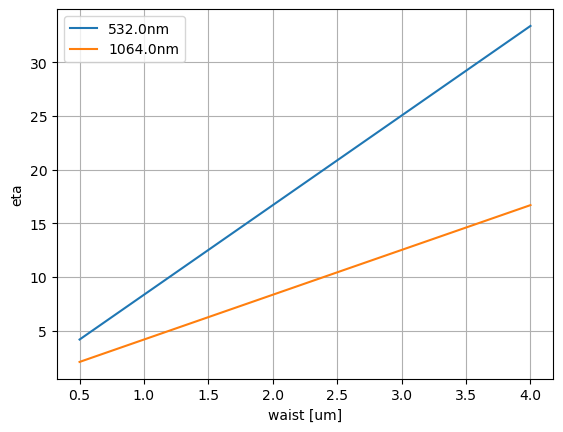

In [8]:
wvls = np.array([532, 1064]) * si.nm
waists = np.linspace(0.5,4) * si.um

for i, wvl in enumerate(wvls):
    eta = np.sqrt(2)*np.pi * waists/wvl
    plt.plot(waists/si.um,eta,label=f"{wvl/si.nm}nm")

plt.ylabel("eta")
plt.xlabel("waist [um]")
plt.grid()
plt.legend()
plt.show()